# Image Classification using Feedforward Neural Network in Keras
---
[Original url](https://www.learnopencv.com/image-classification-using-feedforward-neural-network-in-keras/)

In [2]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data

Keras comes with the MNIST data loader. Keras has a function `mnist.load_data()` which downloads the data from its servers if it is not present already. The data loaded using this function is divided into training and test sets.

In [3]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


# Checkout the data

The data consists of handwritten numbers ranging from 0 to 9, along with their ground truth. It has 60,000 train samples and 10,000 test samples. Each sample is a 28x28 grayscale image.

In [4]:
from keras.utils import to_categorical

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 7')

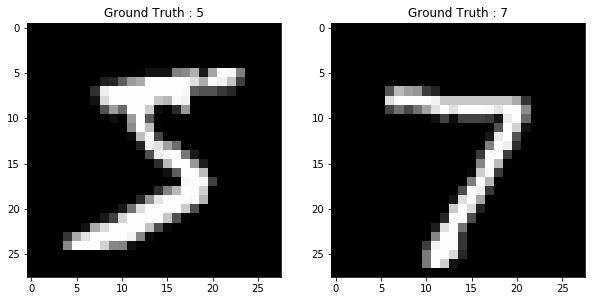

In [5]:
print('Training data shape : ', train_images.shape, train_labels.shape)

print('Testing data shape : ', test_images.shape, test_labels.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.figure(figsize=[10,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))


# Process the data

* The images are grayscale and the pixel values range from 0 to 255.
* Convert each image matrix ( 28x28 ) to an array ( 28*28 = 784 dimenstional ) which will be fed to the network as a single feature.
* We convert the data to float and **scale** the values between 0 to 1.
* We also convert the labels from integer to **categorical ( one-hot ) encoding** since that is the format required by Keras to perform multiclass classification. One-hot encoding is a type of boolean representation of integer data. It converts the integer to an array of all zeros except a 1 at the index of the number. For example, using a one-hot encoding of 10 classes, the integer 5 will be encoded as 0000010000

In [10]:
# Change from matrix to array of dimension 28x28 to array of dimention 784
dimData = np.prod(train_images.shape[1:])
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

In [11]:
# Change to float datatype
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

In [12]:
# Scale the data to lie between 0 to 1
train_data /= 255
test_data /= 255

In [13]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [14]:
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  5
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Create the network

In [15]:
from keras.models import Sequential
from keras.layers import Dense

In [16]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(nClasses, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


# Configure the Network

In [17]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Network

In [18]:
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                   validation_data=(test_data, test_labels_one_hot))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 40us/step - loss: 0.2719 - acc: 0.9161 - val_loss: 0.1163 - val_acc: 0.9627
Epoch 2/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0928 - acc: 0.9713 - val_loss: 0.0872 - val_acc: 0.9720
Epoch 3/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0582 - acc: 0.9818 - val_loss: 0.0793 - val_acc: 0.9772
Epoch 4/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.0402 - acc: 0.9874 - val_loss: 0.0593 - val_acc: 0.9826
Epoch 5/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.0279 - acc: 0.9909 - val_loss: 0.0669 - val_acc: 0.9812
Epoch 6/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.0208 - acc: 0.9933 - val_loss: 0.0794 - val_acc: 0.9799
Epoch 7/20
60000/60000 [==============================] - 1s 18us/step - loss: 0

# Plot the loss and accuracy curves

Text(0.5, 1.0, 'Loss Curves')

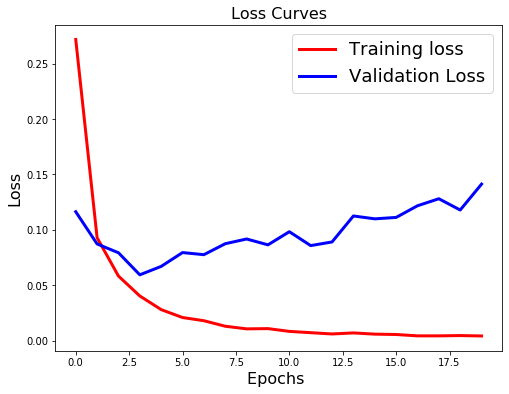

In [19]:
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

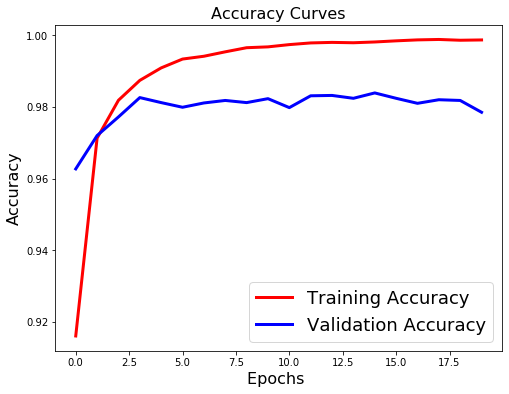

In [20]:
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

# Evaluate the trained network on test data

In [21]:
[test_loss, test_acc] = model.evaluate(test_data, test_labels_one_hot)

10000/10000 [==============================] - 0s 38us/step


In [22]:
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Evaluation result on Test Data : Loss = 0.14126975353257482, accuracy = 0.9785


# Create a new network with Dropout Regularization

In [23]:
from keras.layers import Dropout
model_reg = Sequential()
model_reg.add(Dense(512, activation='relu', input_shape=(dimData,)))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(512, activation='relu'))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(nClasses, activation='softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [24]:
model_reg.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
history_reg = model_reg.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, 
                            validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.3786 - acc: 0.8832 - val_loss: 0.1390 - val_acc: 0.9563
Epoch 2/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.1684 - acc: 0.9499 - val_loss: 0.1080 - val_acc: 0.9655
Epoch 3/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.1310 - acc: 0.9606 - val_loss: 0.0852 - val_acc: 0.9732
Epoch 4/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.1109 - acc: 0.9667 - val_loss: 0.0821 - val_acc: 0.9763
Epoch 5/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.0997 - acc: 0.9700 - val_loss: 0.0783 - val_acc: 0.9778
Epoch 6/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.0898 - acc: 0.9737 - val_loss: 0.0724 - val_acc: 0.9801
Epoch 7/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.0821 - acc: 0.9763 - val_loss: 0.0756 - val_acc

Text(0.5, 1.0, 'Loss Curves')

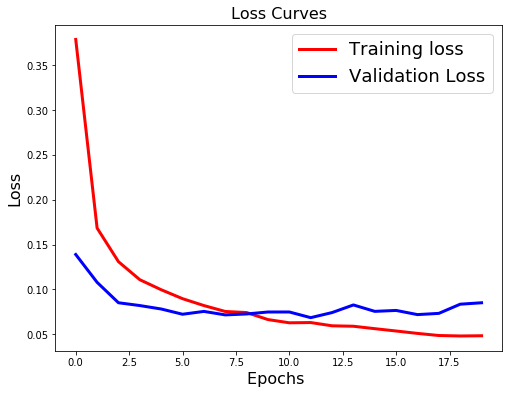

In [26]:
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['loss'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

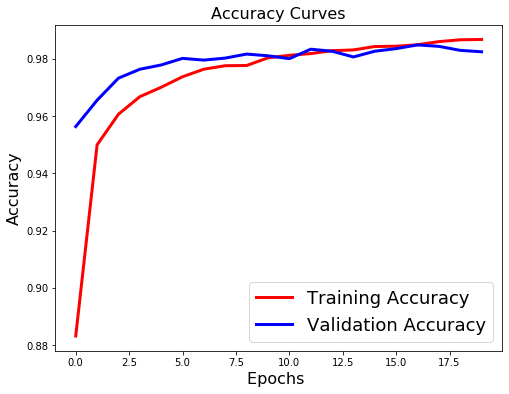

In [27]:
plt.figure(figsize=[8,6])
plt.plot(history_reg.history['acc'],'r',linewidth=3.0)
plt.plot(history_reg.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [28]:
[test_loss, test_acc] = model_reg.evaluate(test_data, test_labels_one_hot)

10000/10000 [==============================] - 0s 39us/step


In [29]:
print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

Evaluation result on Test Data : Loss = 0.08519705596475914, accuracy = 0.9824


# Predict the first image from test data

We have seen that the first image is the number 7. Let us predict using the model

In [30]:
# Predict the probabilities for each class 
model_reg.predict(test_data[[0],:])

array([[1.3157949e-22, 6.0958288e-17, 2.6626542e-13, 1.3571910e-13,
        4.5745463e-23, 1.3812816e-18, 8.9731402e-32, 1.0000000e+00,
        4.7667032e-19, 9.4213069e-14]], dtype=float32)

In [31]:
# Predict the most likely class
model_reg.predict_classes(test_data[[0],:])

array([7])